In [1]:
library(linseed)

Setting options('download.file.method.GEOquery'='auto')
Setting options('GEOquery.inmemory.gpl'=FALSE)


In [2]:
getwd()


[1] "/home/mooreank/linseed"

In [3]:
setwd('../../../')
setwd('/labseq/projects/ppmi/wb_rna/')

In [4]:
##GSE77343 = Gene expression in chronic heart failure patients
blood00 <- LinseedObject$new("GSE77343", topGenes=10000)

Found 1 file(s)
GSE77343_series_matrix.txt.gz
Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.
File stored at: 
/tmp/RtmpIcZTfw/GPL11532.annot.gz
14132 probes were removed while mapping probes to genes as non-mapped probes or non-uniqely mapped probes
1174 genes were collapsed while mapping genes to most expressed probe
17990 genes left after collapsing


In [25]:
blood00

<LinseedObject>
  Public:
    calculatePairwiseLinearity: function (negToZero = T) 
    calculateSignificanceLevel: function (iters = 1000, spearmanThreshold = 0, retVal = F) 
    calculateSpearmanCorrelation: function () 
    cellTypeNumber: NULL
    clone: function (deep = FALSE) 
    deconvolutionError: function (dataset = "filtered", error = "norm") 
    deconvolve: function (dataset = "filtered", error = "norm", method = "dsa", 
    deconvolveByEndpoints: function (dataset = "filtered", error = "norm") 
    distances: NULL
    endpoints: NULL
    endpointsProjection: NULL
    exp: list
    filterDataset: function (geneSubset) 
    filterDatasetByPval: function (pval = 0.001) 
    genes: list
    hysime: function (dataset = "filtered", error = "norm", set = FALSE) 
    initialize: function (...) 
    markers: NULL
    name: GSE45535
    pairwise: NULL
    project: function (dataset) 
    projection: NULL
    projectionPlot: function (dims = 1:2, color = NULL) 
    projectiveProject

In [ ]:
# ppmi2 <- LinseedObject$new("ppmi.v121018.transcripts.csv.gz", samples=10:42, topGenes=10000)

Sampling weights [===========================] 100% eta:  0s
Total number of genes is 9999
The number of genes after filtering is 1412


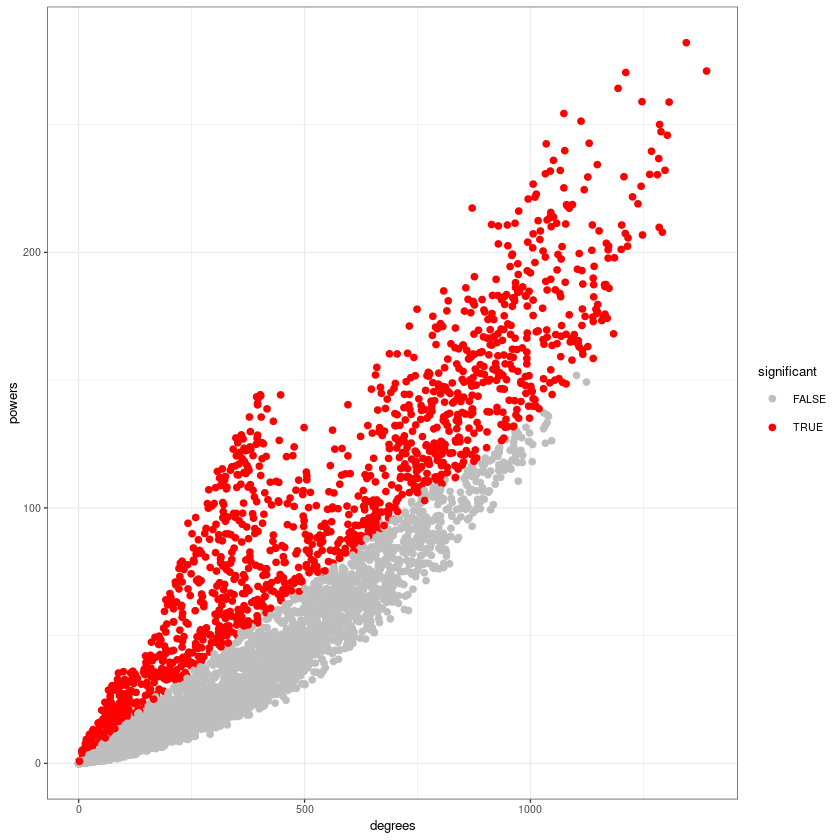

In [5]:
##colinearity networks
blood00$calculatePairwiseLinearity()
blood00$calculateSpearmanCorrelation()
blood00$calculateSignificanceLevel(100)
blood00$significancePlot(0.01)

blood00$filterDatasetByPval(0.01)

In [ ]:
# ppmi2$calculatePairwiseLinearity()
# ppmi2$calculateSpearmanCorrelation()
# ppmi2$calculateSignificanceLevel(100)
# ppmi2$significancePlot(0.01)

Warning message:
“Removed 294 rows containing missing values (geom_point).”Warning message:
“Removed 294 rows containing missing values (geom_path).”

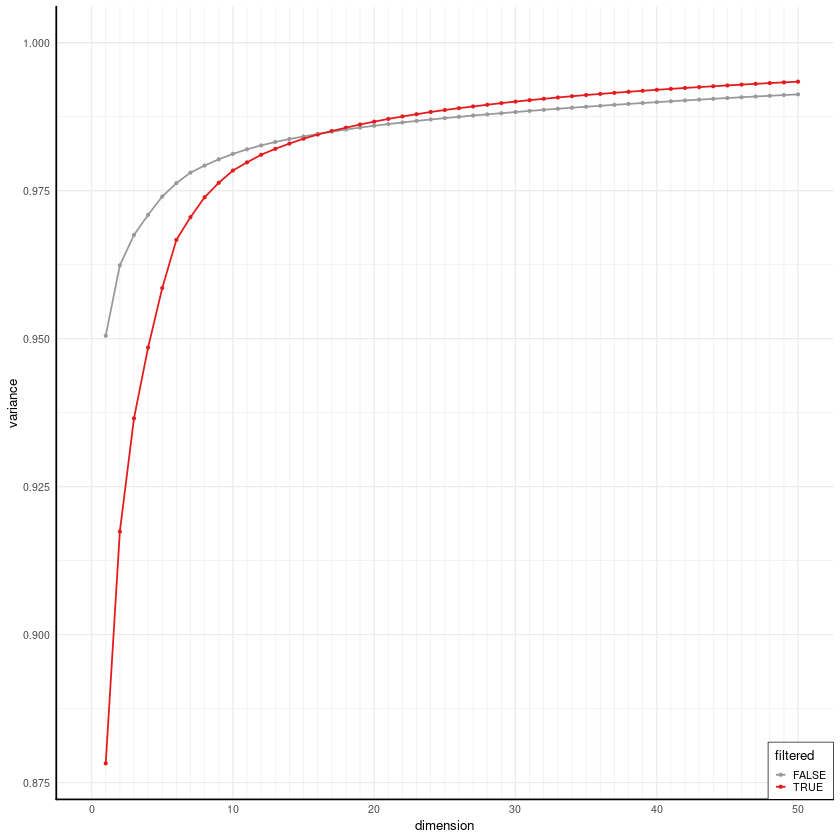

In [6]:
blood00$svdPlot()
##determine numberof cell types by #of dimension elbow occurs at

In [8]:
##visualize after filtering, projection plot
blood00$setCellTypeNumber(5)
# ppmi$project("full") # projecting full dataset
# ppmi$projectionPlot(color="filtered")

In [9]:
##deconvolution
blood00$project("filtered")
blood00$smartSearchCorners(dataset="filtered", error="norm")

Final vector is 


2 3 1 5 6

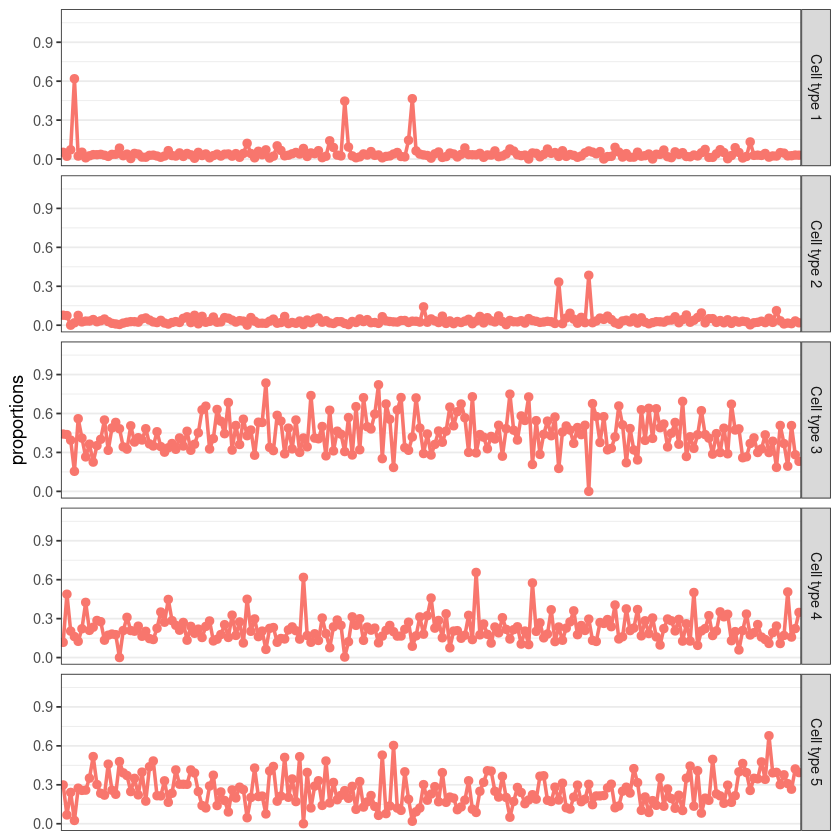

In [10]:

## 
blood00$deconvolveByEndpoints()
plotProportions(blood00$proportions)

In [11]:
tail(blood00$proportions)

,GSM2049464,GSM2049465,GSM2049466,GSM2049467,GSM2049468,GSM2049469,GSM2049470,GSM2049471,GSM2049472,GSM2049473,⋯,GSM2049651,GSM2049652,GSM2049653,GSM2049654,GSM2049655,GSM2049656,GSM2049657,GSM2049658,GSM2049659,GSM2049660
Cell type 1,0.05186316,0.02128103,7.125686e-02,0.61883554,0.02279585,0.05266294,0.009177454,0.02491166,0.03398418,0.03339578,⋯,0.04314287,0.01447734,0.02396529,0.02289217,0.04954106,0.045420491,0.02415519,0.02563970,0.03062972,0.02944074
Cell type 2,0.07692880,0.07399397,3.954413e-07,0.01861675,0.07568215,0.02535980,0.032055793,0.03185093,0.04374907,0.02659315,⋯,0.01969658,0.05378156,0.02160317,0.11242883,0.03419596,0.009630562,0.01660832,0.01179413,0.03305313,0.01853164
Cell type 3,0.44169079,0.43790322,3.947848e-01,0.15453979,0.56015709,0.41059664,0.265510312,0.36416234,0.22547951,0.35274140,⋯,0.43560734,0.29898514,0.38652911,0.18488286,0.50809462,0.368307326,0.19410658,0.50733817,0.28222461,0.23118524
Cell type 4,0.11713612,0.48819500,2.035400e-01,0.16178427,0.12494565,0.22175280,0.425310503,0.20942376,0.23382916,0.28586643,⋯,0.13894729,0.10870288,0.19141569,0.24304824,0.10787713,0.170425449,0.50577423,0.15775247,0.22320696,0.34784646
Cell type 5,0.29879387,0.06743432,2.415464e-01,0.02504991,0.27411679,0.25689843,0.258904304,0.35118079,0.51752993,0.30191716,⋯,0.34172506,0.67823306,0.39182570,0.39606252,0.30097144,0.377149955,0.30898424,0.26594104,0.42218310,0.39391329


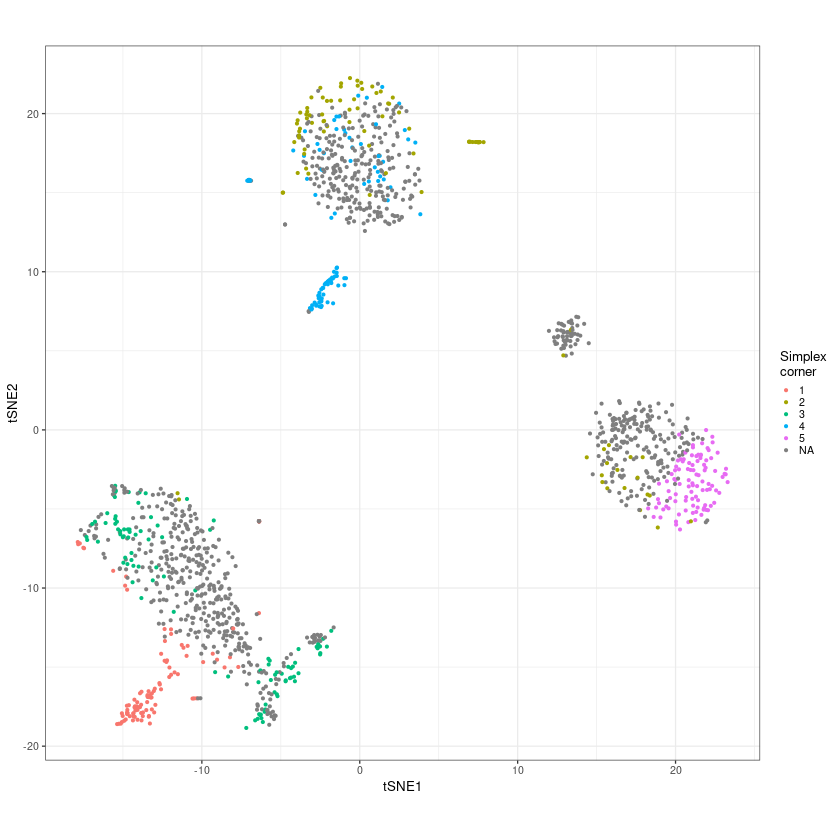

In [12]:
# lets select 100 genes closest to the simplex corners 
##tsne
blood00$selectGenes(100)
blood00$tsnePlot()

In [16]:
getwd()

[1] "/home/mooreank/linseed"

In [15]:
setwd('../../../../')
setwd('home/mooreank/linseed')

In [17]:
genes <- data.frame(blood00$selectGenes(100))
write.csv(genes, "GSE20300_5cell_genes.csv")

In [ ]:
gene1CD <- genes %>%
  filter(str_detect(X1, "CD"))
gene1CD <- gene1CD[['X1']]
gene2CD <- genes %>%
  filter(str_detect(X2, "CD"))
gene2CD <- gene2CD[['X2']]
gene3CD <- genes %>%
  filter(str_detect(X3, "CD"))
gene3CD <- gene3CD[['X3']]
gene4CD <- genes %>%
  filter(str_detect(X4, "CD"))
gene4CD <- gene4CD[['X4']]
gene5CD <- genes %>%
  filter(str_detect(X5, "CD"))
gene5CD <- gene5CD[['X5']]

In [34]:
#gives p value of marker genes
#ppmi$genes

blood$markers

$`1`
  [1] "TYMS"       "RRM2"       "TNFRSF17"   "ZWINT"      "HERC2P7"   
  [6] "NUSAP1"     "SPATS2"     "ITM2C"      "SEC11C"     "MANEA"     
 [11] "IRF4"       "SLAMF7"     "ALG14"      "CENPU"      "PDIA4"     
 [16] "UAP1"       "PTTG1"      "JCHAIN"     "SDF2L1"     "IGKC"      
 [21] "TXNDC11"    "HSP90B1"    "FUT8"       "PRDX4"      "HIBCH"     
 [26] "MYDGF"      "DCPS"       "MANF"       "SLC44A1"    "TUBG1"     
 [31] "EZH2"       "STT3A"      "SSR3"       "FABP5"      "TRAM2"     
 [36] "FAM69A"     "FEN1"       "STMN1"      "AVEN"       "MCUR1"     
 [41] "HSPA13"     "UBA5"       "SRM"        "H2AFX"      "GPX7"      
 [46] "FAM98A"     "ZNF593"     "RACGAP1"    "NME1"       "PDIA6"     
 [51] "LARP1B"     "SLC38A5"    "LTK"        "ISOC2"      "DENND1B"   
 [56] "B4GALT3"    "LZTFL1"     "FKBP14"     "DANCR"      "PCNA"      
 [61] "LMAN1"      "CHST12"     "NUS1"       "ABCC4"      "ERLEC1"    
 [66] "PREB"       "NET1"       "GTSF1"      "ST6GALNAC4" "DBF4"      
 [71] "CRELD2"     "MYL6B"      "SLC39A14"   "SLC35F2"    "LINC00888" 
 [76] "TXNDC15"    "CCDC167"    "CKS1B"      "AHCY"       "STARD5"    
 [81] "CLPTM1L"    "NXPE3"      "XBP1"       "ALDH18A1"   "PPIB"      
 [86] "MCM6"       "OR7E37P"    "YIF1A"      "ALG5"       "SEPHS1"    
 [91] "FDX1"       "LRR1"       "OSBPL3"     "MEI1"       "SMARCB1"   
 [96] "OSTC"       "MLEC"       "NCAPG2"     "MCEE"       "SRPRB"     

$`2`
  [1] "CXCL1"      "CYP4F3"     "CMTM2"      "PTGS2"      "CHI3L1"    
  [6] "MGAM"       "HCAR3"      "PI3"        "CXCR2"      "IL1R2"     
 [11] "G0S2"       "KRT23"      "FFAR2"      "MMP25"      "MME"       
 [16] "HIST2H2BE"  "TNFAIP6"    "S100P"      "VNN3"       "ADGRG3"    
 [21] "MMP9"       "PROK2"      "TNFRSF10C"  "LRG1"       "KCNJ2"     
 [26] "KCNJ15"     "AQP9"       "CXCR1"      "SLPI"       "MAK"       
 [31] "FCGR3B"     "THBD"       "CXCL8"      "ADGRE3"     "HIST1H2BC" 
 [36] "CSF3R"      "MXD1"       "CREB5"      "BRE-AS1"    "LINC00528" 
 [41] "ADM"        "B3GNT5"     "IL1B"       "STEAP4"     "OSM"       
 [46] "PPP1R3B"    "IFIT2"      "ERV3-2"     "ASPRV1"     "TREM1"     
 [51] "BCL2A1"     "HSPC102"    "GK"         "ST6GALNAC2" "FPR2"      
 [56] "REPS2"      "RNF24"      "SLC45A4"    "IL1RAP"     "NAMPT"     
 [61] "MRVI1"      "HAL"        "ABHD5"      "FAM129A"    "SIPA1L2"   
 [66] "VNN2"       "ZDHHC18"    "PDLIM7"     "CEP19"      "DGAT2"     
 [71] "ARHGAP26"   "ACSL1"      "LIMK2"      "ALPK1"      "BCL6"      
 [76] "P2RY13"     "DPEP3"      "CCNJL"      "ASAP1-IT1"  "WLS"       
 [81] "PLK3"       "SNORD89"    "STX3"       "LRRC4"      "RFX2"      
 [86] "TIGD3"      "MBOAT7"     "WDFY3"      "IFIT1"      "MPZL3"     
 [91] "F2RL1"      "IFIT3"      "RPL36A"     "SLC22A4"    "GLT1D1"    
 [96] "NCF4"       "AMPD2"      "DOCK5"      "MSRB1"      "PHC2"      

$`3`
  [1] "VPREB3"       "PAX5"         "LINC00926"    "FCRL1"        "TCL1A"       
  [6] "MACROD2"      "CD72"         "MS4A1"        "PKIG"         "AFF3"        
 [11] "FCRL2"        "FCRLA"        "CD22"         "RALGPS2"      "SLC9A7"      
 [16] "BANK1"        "CD79B"        "CD19"         "SPIB"         "CDCA7L"      
 [21] "P2RX5"        "BLK"          "RABEP2"       "STAP1"        "PIK3C2B"     
 [26] "RAB30"        "TSPAN3"       "CCDC191"      "SLC30A4"      "GGA2"        
 [31] "QRSL1"        "IFT57"        "RRAS2"        "BLNK"         "STRBP"       
 [36] "PPM1K"        "NUP88"        "KATNAL1"      "IL21R"        "POLH"        
 [41] "SP140L"       "PHTF2"        "DGKD"         "ZNF550"       "TMEM147-AS1" 
 [46] "ARL10"        "TULP4"        "SGSM3"        "ZNF585B"      "SLC12A2"     
 [51] "DDHD2"        "PPP1R16B"     "EZR"          "NAA40"        "ZBED5"       
 [56] "ZNF605"       "CEP120"       "KIAA1147"     "CYB5A"        "MAP4K1"      
 [61] "PHLPP2"       "ZNF606"       "SLC39A10"     "TIA1"         "ALG13"       
 [66] "AIDA"         "ARID5B"       "ZNF529"       "VEGFB"        "NAA25"       
 [71] "OS

In [23]:
#help(heatmap)
heatmap(ppmi$genes)

ERROR: Error in heatmap(ppmi$genes): 'x' must be a numeric matrix
